<a href="https://colab.research.google.com/github/QuemadaJohn/CSST104-3B-AY2526/blob/main/CSST104_Laboratory_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1: Import Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import geopandas as gpd
import folium

# **Task 2: Load Natural Earth Dataset**

## **Guide Questions Answers:**

**1.How many columns does the dataset contain?**

  The dataset contains 63 columns , including administrative information like country name, continent, population, GDP, and geometry.

**2.What type of geometries are included?**

The dataset includes MultiPolygon and Polygon geometries representing country boundaries.

**3.What does the geometry column represent?**

The geometry column contains the spatial coordinates that define the boundaries of each country.

        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL 

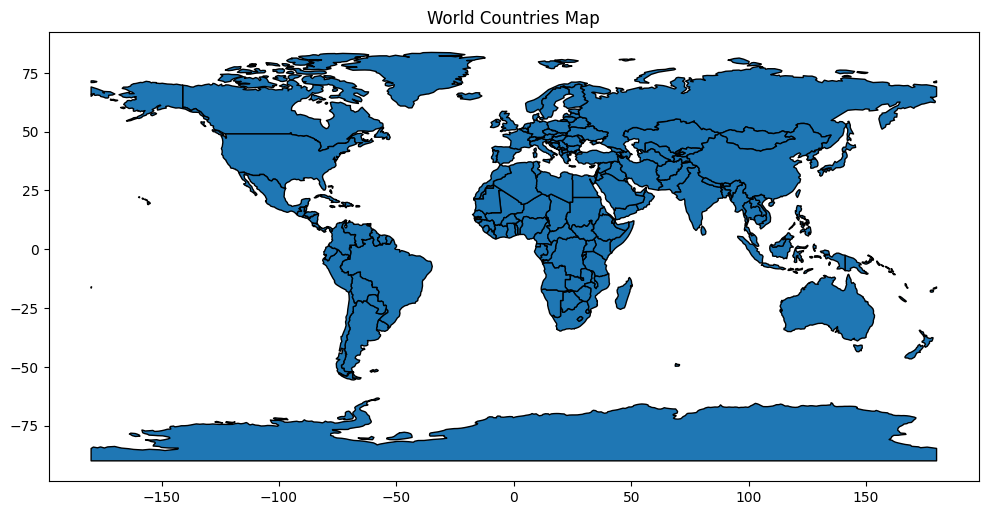

In [ ]:
# Load Natural Earth Dataset
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

# Display first 5 rows
print(world.head())

# Plot the world map
world.plot(figsize=(12, 6), edgecolor='black')
plt.title('World Countries Map')
plt.show()

# **Task 3: Check the Coordinate Reference System**

In [ ]:
print("Current CRS:", world.crs)

Current CRS: EPSG:4326


## **Guide Questions Answers:**

**1.What does EPSG:4326 represent?**

EPSG:4326 represents the WGS84 geographic coordinate system, which uses latitude and longitude coordinates in decimal degrees. It's the standard for GPS and global mapping.

**2.Why is CRS important in spatial analysis?**

CRS is crucial because it defines how spatial data maps to the Earth's surface. Different CRS use different projections and units, affecting distance measurements, area calculations, and spatial relationships.

# **Task 4: Convert to Metric CRS for Area Calculation**

## **Guide Questions Answers:**

**1.Why can't we compute area accurately using EPSG:4326?**

EPSG:4326 uses angular units (degrees), not linear units. Degrees represent angles on a sphere, not consistent distances on the Earth's surface. A degree of longitude at the equator covers about 111 km, but near the poles it approaches zero.

**2.What unit is EPSG:3857 based on?**

EPSG:3857 (Web Mercator) is based on meters. It's a projected coordinate system that converts Earth's surface to a flat plane, enabling accurate distance and area calculations.



In [ ]:
# Reproject to Metric CRS (Web Mercator)
world_projected = world.to_crs(epsg=3857)

# Compute Area (in square meters)
world_projected["area_m2"] = world_projected.geometry.area

# Display results
print(world_projected[["ADMIN", "area_m2"]].head(10))
print("\nArea Reprojection Complete")

# Optional: Convert to square kilometers
world_projected["area_km2"] = world_projected["area_m2"] / 1_000_000

                         ADMIN       area_m2
0                         Fiji  2.128334e+10
1  United Republic of Tanzania  9.522552e+11
2               Western Sahara  1.171023e+11
3                       Canada  5.216648e+13
4     United States of America  2.186228e+13
5                   Kazakhstan  6.177084e+12
6                   Uzbekistan  8.309210e+11
7             Papua New Guinea  4.740243e+11
8                    Indonesia  1.840122e+12
9                    Argentina  4.328068e+12

Area Reprojection Complete


# **Task 5: Extract Centroid Coordinates**

## **Guide Questions Answers:**

**1.What is a centroid?**

A centroid is the geometric center of a polygon, calculated as the average of all points that make up the shape. For irregular countries, it's like the "balance point" of the shape.

**2.How can centroid coordinates be used in clustering?**

Centroid coordinates can represent country locations for geographic clustering algorithms (like K-means), helping identify regional patterns, economic zones, or proximity-based groups.

**3.Why do we extract X and Y separately?**

Extracting X and Y separately creates numeric columns that can be used directly in machine learning models, statistical analysis, and visualization libraries that don't natively handle geometry objects.

In [ ]:
# Extract Centroid
world_projected["centroid"] = world_projected.geometry.centroid
world_projected["x"] = world_projected.centroid.x
world_projected["y"] = world_projected.centroid.y

print(world_projected[["ADMIN", "x", "y"]].head(10))

                         ADMIN             x             y
0                         Fiji  1.824878e+07 -1.958098e+06
1  United Republic of Tanzania  3.869296e+06 -7.003071e+05
2               Western Sahara -1.348403e+06  2.794163e+06
3                       Canada -1.079779e+07  1.044422e+07
4     United States of America -1.329713e+07  6.667416e+06
5                   Kazakhstan  7.493752e+06  6.185359e+06
6                   Uzbekistan  7.026619e+06  5.135220e+06
7             Papua New Guinea  1.617688e+07 -7.208118e+05
8                    Indonesia  1.307244e+07 -2.487479e+05
9                    Argentina -7.282320e+06 -4.397998e+06


# **Task 5.Plot the top 10 largest countries by area**

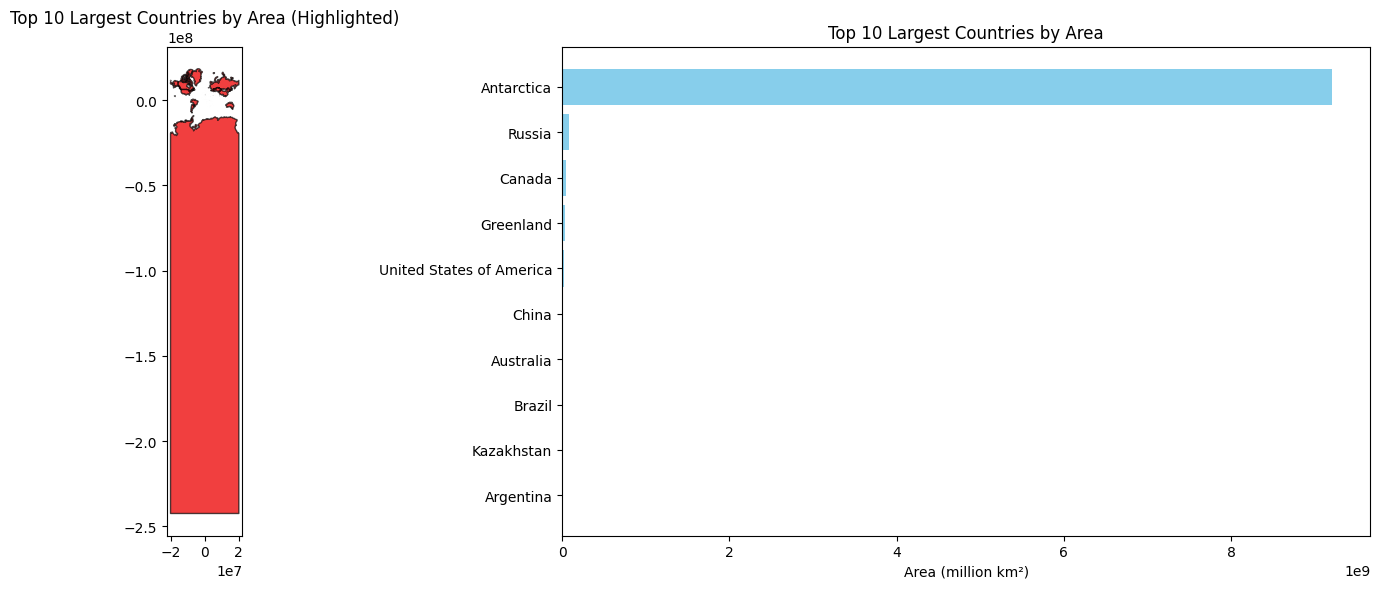


Top 10 Largest Countries:
                   ADMIN     area_km2
              Antarctica 9.204514e+09
                  Russia 8.304514e+07
                  Canada 5.216648e+07
               Greenland 3.628550e+07
United States of America 2.186228e+07
                   China 1.497731e+07
               Australia 9.651737e+06
                  Brazil 9.059541e+06
              Kazakhstan 6.177084e+06
               Argentina 4.328068e+06


In [ ]:
# Sort by area and get top 10
top_10_countries = world_projected.nlargest(10, "area_m2")

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Map of top 10 countries
world_projected.plot(ax=ax1, color='lightgray', edgecolor='white')
top_10_countries.plot(ax=ax1, color='red', edgecolor='black', alpha=0.7)
ax1.set_title('Top 10 Largest Countries by Area (Highlighted)')

# Plot 2: Bar chart of areas (in million km²)
top_10_countries_sorted = top_10_countries.sort_values('area_m2', ascending=True)
areas_millions = top_10_countries_sorted['area_m2'] / 1_000_000
ax2.barh(top_10_countries_sorted['ADMIN'], areas_millions, color='skyblue')
ax2.set_xlabel('Area (million km²)')
ax2.set_title('Top 10 Largest Countries by Area')
plt.tight_layout()
plt.show()

# Display as table
print("\nTop 10 Largest Countries:")
print(top_10_countries[['ADMIN', 'area_km2']].sort_values('area_km2', ascending=False).to_string(index=False))

# **Reflection**

### During this lab, I encountered challenges understanding the difference between geographic and projected coordinate systems. Initially, I couldn't grasp why area calculations from the original dataset were incorrect until I learned about EPSG codes and map projections. This hands-on experience taught me that spatial data requires careful CRS consideration before any quantitative analysis. I also discovered how GeoPandas seamlessly integrates with traditional data science libraries, making geospatial feature extraction straightforward. The most valuable takeaway was learning to extract meaningful features like centroids and areas from complex geometry objects, which opens possibilities for incorporating spatial data into machine learning pipelines. Overall, this lab demonstrated that proper geospatial preprocessing is as critical as data cleaning in traditional ML workflows